In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout


In [30]:
data = []
labels = []
classes = 9
cur_path = os.getcwd()
#Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path,'Signs',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=6)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

(215, 32, 32, 4) (215,)
(172, 32, 32, 4) (43, 32, 32, 4) (172,) (43,)


In [31]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(9, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15 #15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("sign_model.h5")

Epoch 1/15
6/6 [==============================] - 1s 93ms/step - loss: 22.5671 - accuracy: 0.1919 - val_loss: 2.0617 - val_accuracy: 0.2558
Epoch 2/15
6/6 [==============================] - 0s 63ms/step - loss: 2.6912 - accuracy: 0.2674 - val_loss: 1.8778 - val_accuracy: 0.3488
Epoch 3/15

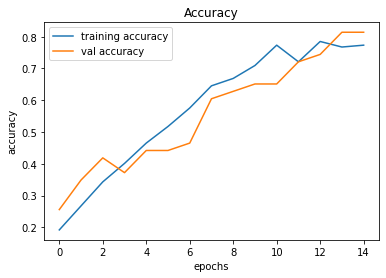

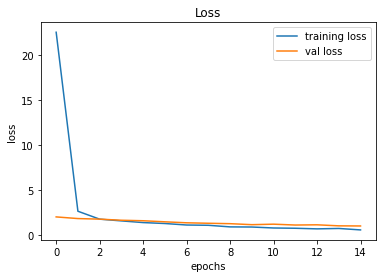

In [32]:


#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:


#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('testset.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))
X_test=np.array(data)
# pred = model.predict_classes(X_test)

pred = model.predict(X_test)
# predict = model.predict(img)
# predict=np.argmax(predict,axis=1)
pred = np.argmax(pred,axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('my_classifier.h5')


0.7222222222222222


In [35]:
probability_model = Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

In [36]:
predictions[0]

array([0.12582791, 0.10098091, 0.11784077, 0.1002285 , 0.09879442,
       0.10885368, 0.14351898, 0.09909021, 0.10486462], dtype=float32)

In [43]:
np.argmax(predictions[0])

classes[0+1]

'End'

In [44]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label+1],
                                100*np.max(predictions_array),
                                classes[true_label+1]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

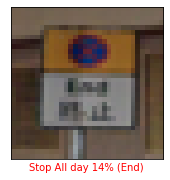

In [54]:
newLabel = np.array(labels)


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newLabel, X_test)
plt.show()

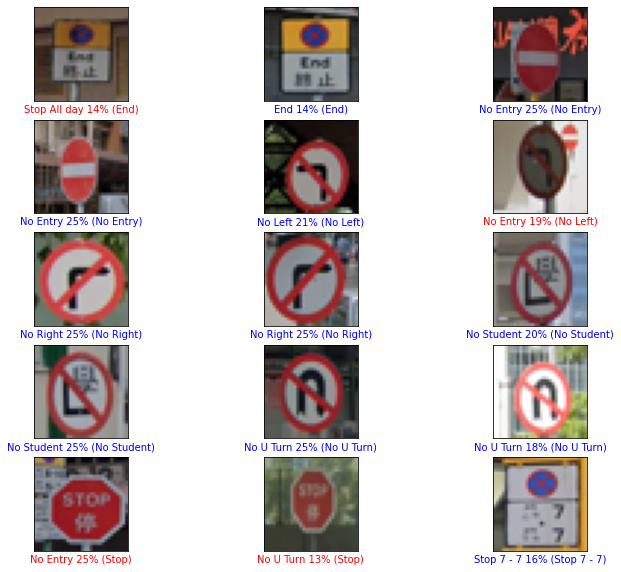

In [56]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], newLabel, X_test)
plt.show()